In [14]:
import os
import cv2
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras.api.preprocessing.image import load_img, img_to_array
from keras.api.utils import to_categorical
import glob

(256, 256, 3)


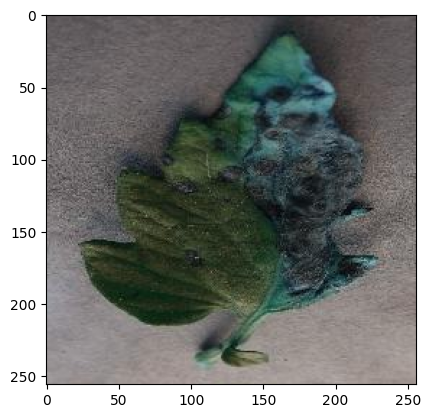

In [15]:
DIR = "/kaggle/input/plantvillage-dataset/color"
CATEGORIES = ['Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight']


for category in CATEGORIES:
    path = os.path.join(DIR, category)
    for image in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path, image))
        plt.imshow(img_arr)
        print(img_arr.shape)
        break
    break



In [16]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DIR, category)
        classes = CATEGORIES.index(category)

        for image in os.listdir(path):
            img = load_img(os.path.join(path, image), target_size=(224, 224))
            img_arr = img_to_array(img)
            img_arr = img_arr/255
            print("Shape: ", img_arr.shape)
            training_data.append([img_arr, classes])

print(img_arr.shape)

img_data = np.array(training_data)
img_data = img_data.astype('float32')
print (img_data.shape)


create_training_data()

(256, 256, 3)
(0,)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224, 224, 3)
Shape:  (224,

In [17]:
print(len(training_data))
import random

random.shuffle(training_data)

for sample in  training_data[:10]:
    print(sample[1])


4500
0
0
2
2
2
1
0
2
2
1


In [18]:
features = []
labels = []


for x, y in training_data:
    features.append(x)
    labels.append(y)

x = np.array(x).reshape(-1, 224, 224, 3)

In [19]:
import pickle

# dumping the features and labels
pickle_out = open("features.pkl","wb")
pickle.dump(features, pickle_out)
pickle_out.close()

pickle_out = open("labels.pkl","wb")
pickle.dump(labels, pickle_out)
pickle_out.close()

In [20]:
pickle_in_features = open('features.pkl', 'rb')
x = pickle.load(pickle_in_features)
x = np.array(x, dtype=np.float64)

pickle_in_labels = open('labels.pkl', 'rb')
y = pickle.load(pickle_in_labels)
y = np.array(y, dtype=np.int64)
y = to_categorical(y)

In [21]:
print(len(x))
print(len(y))

4500
4500


In [22]:
import pickle
import time
import numpy as np
import pandas as pd
from keras.preprocessing import image
import tensorflow as tf
from keras.applications.mobilenet import preprocess_input, decode_predictions
from keras.layers import Dense, Activation, Flatten, Dropout
# Instead of "from keras.layers import merge, Input", use:
from keras import Input  # Input is now directly under keras
from keras.layers import concatenate # merge is replaced with concatenate
from keras.models import Model
from keras.applications.mobilenet import MobileNet
#from keras.utils import np_utils # This line is causing the error, remove it.
from tensorflow.keras.utils import to_categorical # to_categorical is now here

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3150, 224, 224, 3)
(3150, 3)
(1350, 224, 224, 3)
(1350, 3)


In [24]:
classes = 3

image_input = Input(shape=(224, 224, 3))

model = MobileNet(input_tensor=image_input, include_top=True, weights='imagenet')

last_layer = model.output
x = Flatten(name='flatten')(last_layer)
out = Dense(classes, activation='softmax', name='output')(last_layer)
custom_vgg_model = Model(image_input, out)
custom_vgg_model.summary()


print(image_input.shape)


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,256,867 (16.24 MB)

 Trainable params: 4,234,979 (16.16 MB)

 Non-trainable params: 21,888 (85.50 KB)

(None, 224, 224, 3)


In [25]:
for layer in custom_vgg_model.layers[:-1]: # This line uses custom_vgg_model
    layer.trainable = False

# opt = keras.optimizers.RMSprop(learning_rate=0.05)

custom_vgg_model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy']) # Changed to custom_vgg_model

t = time.time()

EPOCH = 20
hist = custom_vgg_model.fit(x_train, y_train, batch_size=32, epochs=EPOCH, verbose=2, validation_split=0.2) # Changed to custom_vgg_model


print('Training time: %s' % (t - time.time()))

Epoch 1/20
79/79 - 16s - 201ms/step - accuracy: 0.4595 - loss: 1.0843 - val_accuracy: 0.4587 - val_loss: 1.0697
Epoch 2/20
79/79 - 2s - 29ms/step - accuracy: 0.5437 - loss: 1.0512 - val_accuracy: 0.5286 - val_loss: 1.0431
Epoch 3/20
79/79 - 2s - 28ms/step - accuracy: 0.5921 - loss: 1.0237 - val_accuracy: 0.5587 - val_loss: 1.0206
Epoch 4/20
79/79 - 2s - 28ms/step - accuracy: 0.6020 - loss: 0.9996 - val_accuracy: 0.5841 - val_loss: 1.0004
Epoch 5/20
79/79 - 2s - 28ms/step - accuracy: 0.6210 - loss: 0.9785 - val_accuracy: 0.6063 - val_loss: 0.9825
Epoch 6/20
79/79 - 2s - 28ms/step - accuracy: 0.6448 - loss: 0.9593 - val_accuracy: 0.6175 - val_loss: 0.9656
Epoch 7/20
79/79 - 2s - 28ms/step - accuracy: 0.6647 - loss: 0.9415 - val_accuracy: 0.6302 - val_loss: 0.9500
Epoch 8/20
79/79 - 2s - 28ms/step - accuracy: 0.6774 - loss: 0.9252 - val_accuracy: 0.6444 - val_loss: 0.9354
Epoch 9/20
79/79 - 2s - 29ms/step - accuracy: 0.6944 - loss: 0.9100 - val_accuracy: 0.6587 - val_loss: 0.9213
Epoch 10

In [27]:
# Evaluate the MobileNet model
(loss, accuracy) = custom_vgg_model.evaluate(x_test, y_test, batch_size=10, verbose=2)

# Print the evaluation results
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))


135/135 - 3s - 20ms/step - accuracy: 0.7037 - loss: 0.8131
[INFO] loss=0.8131, accuracy: 70.3704%


In [ ]:
import numpy as np  
from sklearn.model_selection import train_test_split  
from sklearn.datasets import load_iris  
from keras.models import Sequential  
from keras.layers import Dense  

# Sample data (using Iris dataset for demonstration)  
data = load_iris()  
X = data.data  
y = data.target  

# Splitting the data into training and testing sets  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

# Define the model  
model = Sequential()  
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))  # Input layer  
model.add(Dense(3, activation='softmax'))  # Output layer for multi-class classification  

# Compile the model  
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  

# Fit the model  
model.fit(X_train, y_train, epochs=50, batch_size=5, verbose=1)  

# Make predictions  
y_pred = model.predict(X_test)  
y_pred_classes = np.argmax(y_pred, axis=1)  

# Import classification report  
from sklearn.metrics import classification_report  
print(classification_report(y_test, y_pred_classes))  

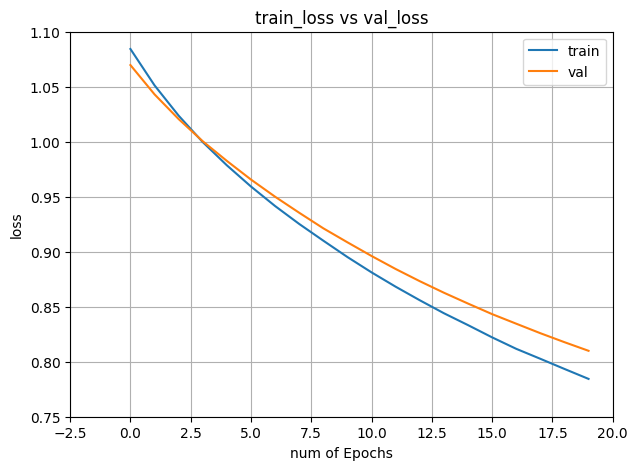

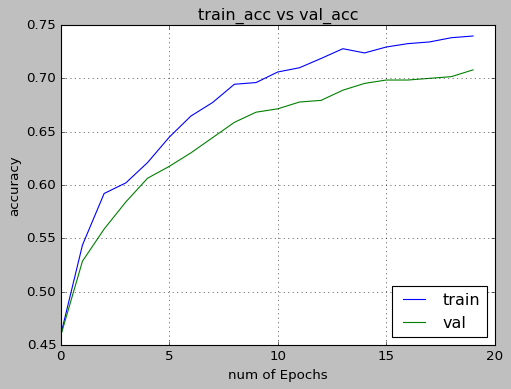

In [28]:
import matplotlib.pyplot as plt

train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc = range(20)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
plt.style.use(['classic'])

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
              precision    recall  f1-score   support

           0       0.57      0.23      0.32       301
           1       0.79      0.81      0.80       484
           2       0.67      0.87      0.75       565

    accuracy                           0.70      1350
   macro avg       0.68      0.63      0.63      1350
weighted avg       0.69      0.70      0.67      1350



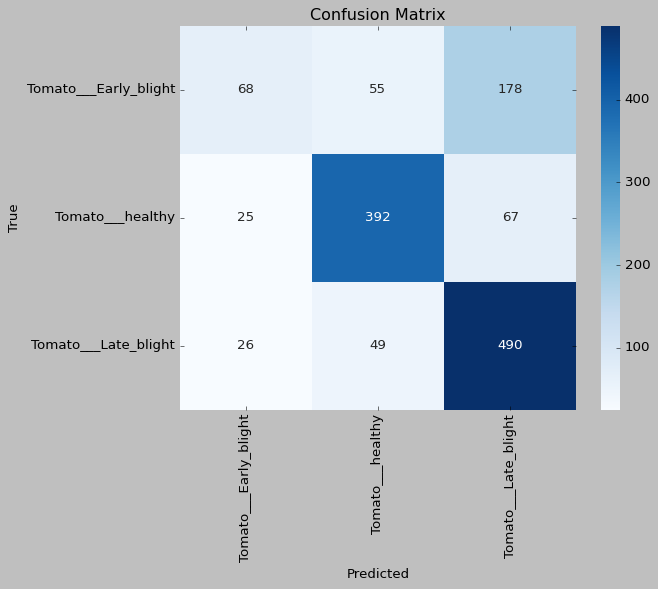

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 'custom_vgg_model', 'x_test', and 'y_test' already defined

# Convert y_test to class indices if it is one-hot encoded
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test

# Getting predictions from the model
y_pred = custom_vgg_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Printing classification report
print(classification_report(y_test_classes, y_pred_classes))

# Computing confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
